In [502]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import os
from os import path
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing, model_selection, svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import datetime
from datetime import datetime
import time
import math
import statsmodels.graphics.tsaplots as sm
from matplotlib import pyplot
import statsmodels.tsa.stattools as st
from sklearn import metrics

In [503]:
os.chdir("C:\\Users\\ZEESHAN\\Python Study\\Python Finance")

In [504]:
if path.exists("AAPL.csv"):
    df=pd.read_csv("AAPL.csv")

In [505]:
#Exploratory Data Analysis

In [506]:
df.shape 

(250, 7)

In [507]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
1,2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2,2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
3,2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
4,2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300


In [508]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2019-08-30,210.160004,210.449997,207.199997,208.740005,208.740005,21143400
246,2019-09-03,206.429993,206.979996,204.220001,205.699997,205.699997,20023000
247,2019-09-04,208.389999,209.479996,207.320007,209.190002,209.190002,19188100
248,2019-09-05,212.000000,213.970001,211.509995,213.279999,213.279999,23913700
249,2019-09-06,214.050003,214.419998,212.509995,213.259995,213.259995,19350800


In [509]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [510]:
#Converting Date to Index

In [511]:
df['Date']=pd.to_datetime(df['Date'])

In [512]:
df.set_index('Date',inplace=True)

In [513]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300


In [514]:
df.info()   #columns and Datatypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-09-10 to 2019-09-06
Data columns (total 6 columns):
Open         250 non-null float64
High         250 non-null float64
Low          250 non-null float64
Close        250 non-null float64
Adj Close    250 non-null float64
Volume       250 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [515]:
df.describe()  #Summary Statistics


,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,192.092360,194.140440,190.083600,192.116880,190.507695,3.258498e+07
std,21.062178,21.207069,20.938713,21.009097,20.814951,1.394851e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.737499,175.902496,173.362499,174.757499,173.279304,2.289640e+07
50%,196.364998,198.750000,193.805000,196.345001,195.165612,2.942395e+07
75%,207.449997,209.089996,205.104996,207.479996,206.476417,3.897412e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


In [516]:
df.corr()    #Correlation matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997186,0.995706,0.992602,0.991302,-0.165963
High,0.997186,1.000000,0.995246,0.995906,0.994256,-0.146977
Low,0.995706,0.995246,1.000000,0.996906,0.996587,-0.213444
Close,0.992602,0.995906,0.996906,1.000000,0.998925,-0.193949
Adj Close,0.991302,0.994256,0.996587,0.998925,1.000000,-0.211065
Volume,-0.165963,-0.146977,-0.213444,-0.193949,-0.211065,1.000000


In [517]:
#Visualizing Data

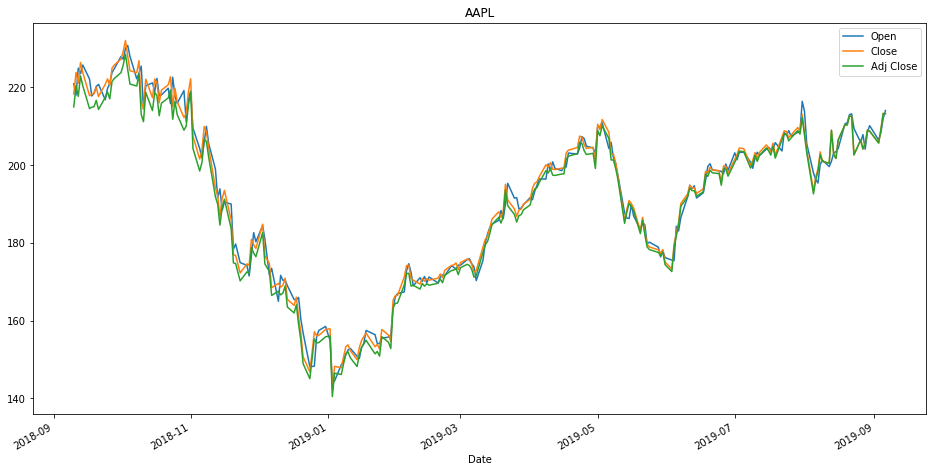

In [518]:
df['Open'].plot(label='Open',figsize=(16,8),title='AAPL')
df['Close'].plot(label='Close')
df['Adj Close'].plot(label='Adj Close')
plt.legend()

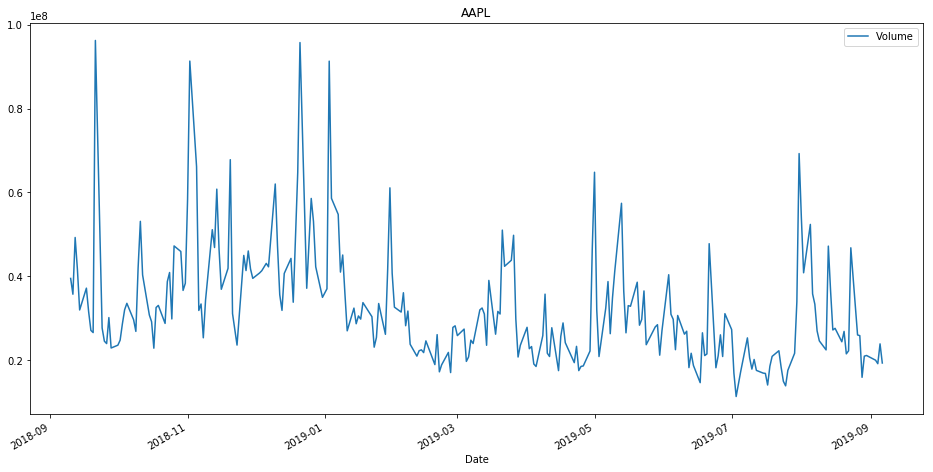

In [519]:
df['Volume'].plot(label='Volume',figsize=(16,8),title='AAPL')
plt.legend()

In [520]:
forecast_out=int(math.ceil(0.04*len(df)))  #10 records of the data

In [521]:
forecast_out

10

In [522]:
forecast_col='Adj Close'   #We will focus on Adj Close for forecasting

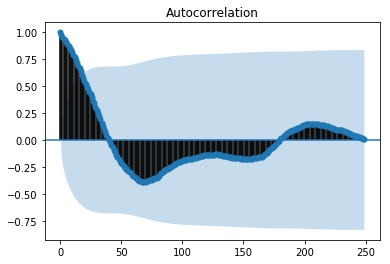

In [523]:
sm.plot_acf(df['Adj Close'])   #Auto Correlation plot for Adj Close
pyplot.show()

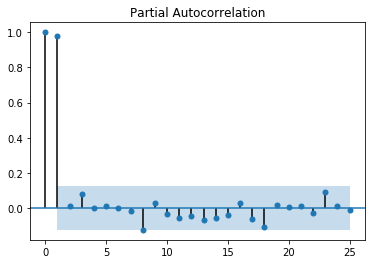

In [524]:
sm.plot_pacf(df['Adj Close'],lags=25)
pyplot.show()

In [525]:
df_orig=df

In [526]:
df['label']=df[forecast_col].shift(-forecast_out)

In [527]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,
2019-08-16,204.279999,207.160004,203.839996,206.500000,206.500000,27620400,208.740005
2019-08-19,210.619995,212.729996,210.029999,210.350006,210.350006,24413600,205.699997
2019-08-20,210.880005,213.350006,210.320007,210.360001,210.360001,26884300,209.190002
2019-08-21,212.990005,213.649994,211.600006,212.639999,212.639999,21535400,213.279999
2019-08-22,213.190002,214.440002,210.750000,212.460007,212.460007,22253700,213.259995
2019-08-23,209.429993,212.050003,201.000000,202.639999,202.639999,46818000,NaN
2019-08-26,205.860001,207.190002,205.059998,206.490005,206.490005,26043600,NaN
2019-08-27,207.860001,208.550003,203.529999,204.160004,204.160004,25873300,NaN
2019-08-28,204.100006,205.720001,203.320007,205.529999,205.529999,15938800,NaN


In [528]:
df.dropna(inplace=True)

In [529]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,
2019-08-16,204.279999,207.160004,203.839996,206.500000,206.500000,27620400,208.740005
2019-08-19,210.619995,212.729996,210.029999,210.350006,210.350006,24413600,205.699997
2019-08-20,210.880005,213.350006,210.320007,210.360001,210.360001,26884300,209.190002
2019-08-21,212.990005,213.649994,211.600006,212.639999,212.639999,21535400,213.279999
2019-08-22,213.190002,214.440002,210.750000,212.460007,212.460007,22253700,213.259995


In [530]:
X=np.array(df.drop(['label'],1))  #All columns except label

In [531]:
Y=np.array(df['label'])   #Label Column

In [532]:
X=preprocessing.scale(X)

In [533]:
X_lately=X[-forecast_out:]

In [534]:
#X=X[:-forecast_out:]

In [535]:
len(X[:-forecast_out:])

230

In [536]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [537]:
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

192 48 192 48


In [538]:
clf=LinearRegression()
clf.fit(X_train,Y_train)
pred1=clf.predict(X_test)

In [539]:
print("MAE",metrics.mean_absolute_error(Y_test, pred1).round(4))
print("MSE",metrics.mean_squared_error(Y_test, pred1).round(4))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test, pred1)).round(4))

MAE 7.7726
MSE 101.6206
RMSE 10.0807


In [540]:
svm_model=svm.SVR()
svm_model.fit(X_train,Y_train)
pred2=svm_model.predict(X_test)

In [541]:
print("MAE",metrics.mean_absolute_error(Y_test, pred2).round(4))
print("MSE",metrics.mean_squared_error(Y_test, pred2).round(4))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test, pred2)).round(4))

MAE 9.3378
MSE 141.9219
RMSE 11.9131


In [542]:
ridge_model=Ridge()
ridge_model.fit(X_train,Y_train)
pred3=ridge_model.predict(X_test)

In [543]:
print("MAE",metrics.mean_absolute_error(Y_test, pred3).round(4))
print("MSE",metrics.mean_squared_error(Y_test, pred3).round(4))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test, pred3)).round(4))

MAE 8.199
MSE 106.1582
RMSE 10.3033


In [544]:
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,Y_train)
pred4=gb_model.predict(X_test)

In [552]:
print("MAE",metrics.mean_absolute_error(Y_test, pred4).round(4))
print("MSE",metrics.mean_squared_error(Y_test, pred4).round(4))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test, pred4)).round(4))

MAE 8.1891
MSE 120.4404
RMSE 10.9745


In [553]:
#Model Comparison
pd.DataFrame({'Linear':[metrics.mean_absolute_error(Y_test, pred1).round(4),metrics.mean_squared_error(Y_test, pred1).round(4),np.sqrt(metrics.mean_squared_error(Y_test, pred1)).round(4)],
             'SVM':[metrics.mean_absolute_error(Y_test, pred2).round(4),metrics.mean_squared_error(Y_test, pred2).round(4),np.sqrt(metrics.mean_squared_error(Y_test, pred2)).round(4)],
             'Ridge':[metrics.mean_absolute_error(Y_test, pred3).round(4),metrics.mean_squared_error(Y_test, pred3).round(4),np.sqrt(metrics.mean_squared_error(Y_test, pred3)).round(4)],
             'GB':[metrics.mean_absolute_error(Y_test, pred4).round(4),metrics.mean_squared_error(Y_test, pred4).round(4),np.sqrt(metrics.mean_squared_error(Y_test, pred4)).round(4)]},['MAE','MSE','RMSE'])
#Since Linear Regression is performing the best we will plot it

,GB,Linear,Ridge,SVM
MAE,8.1891,7.7726,8.1990,9.3378
MSE,120.4404,101.6206,106.1582,141.9219
RMSE,10.9745,10.0807,10.3033,11.9131


In [546]:
forecast1=clf.predict(X_lately)
print(forecast1,pred1,forecast_out)
df['forecast1']=np.nan


[204.60123085 204.51105401 200.71634654 204.83285155 204.19041342
 208.13148487 213.36439306 213.03266844 215.85033097 214.72064311] [182.87688216 210.33527438 189.85898706 200.71634654 203.66140158
 204.42259371 199.5174598  205.04151895 200.0388862  183.5540066
 200.47504578 187.00150195 209.65308455 189.16986596 216.49165724
 168.08378136 210.86340117 183.66865022 198.72626234 184.16895982
 205.61271356 204.68553848 183.29838419 171.02690912 183.64534163
 201.01754931 176.94165257 189.07898692 189.33577777 187.51504627
 201.00079874 215.85033097 181.69302533 204.83285155 168.19238733
 199.49402183 153.18555643 186.5307675  206.84910447 158.0579733
 210.33819843 174.83485161 149.88472866 198.30327759 198.4574763
 157.09293148 170.79312007 171.37766137] 10


In [547]:
last_date=df.iloc[-1].name
last_unix=(last_date).timestamp()
one_day=86400
next_unix=last_unix+one_day

for i in pred1:
    next_date=datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]

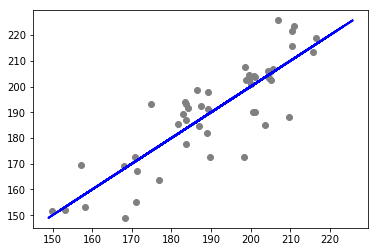

In [548]:
plt.scatter(pred1, Y_test, color="gray")
plt.plot(Y_test, Y_test, color='blue', linewidth=2)

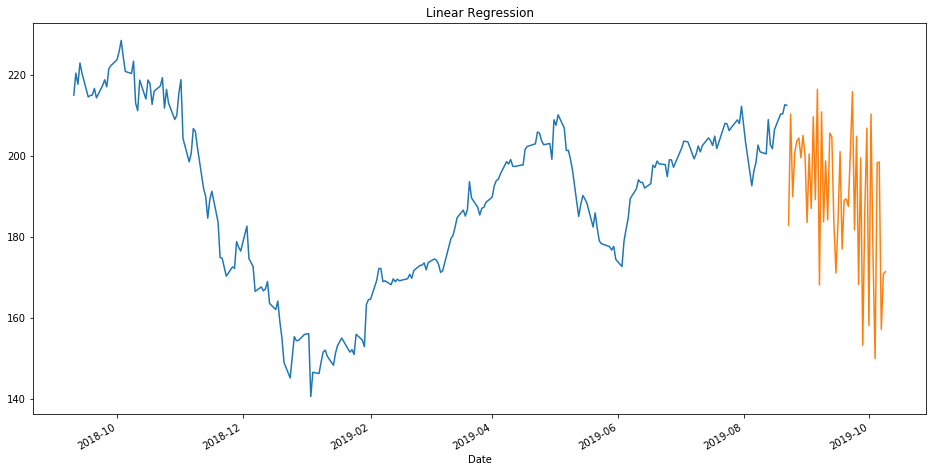

In [549]:
df['Adj Close'].plot(figsize=(16,8),title="Linear Regression")
df['forecast1'].plot()
plt.show()